# ML-Regressionsmodelle mit Haupkomponennten als Regressoren
**Die ML-Modelle in dem Notebook mit den statsischen Maßen:**
- SVR
- Randomforestregressor
- XGB
- Neuronalesnetz
- KNNR

In [1]:
from help_functions import load_stat_feature_pca
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import joblib

## SVR

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 10}
+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.984 | 84.308 | 128.558 | 5.45 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.13863297 0.16990657 0.17589986 0.16254538 0.16009573]
Durchschnittliches RMSE: 0.1614


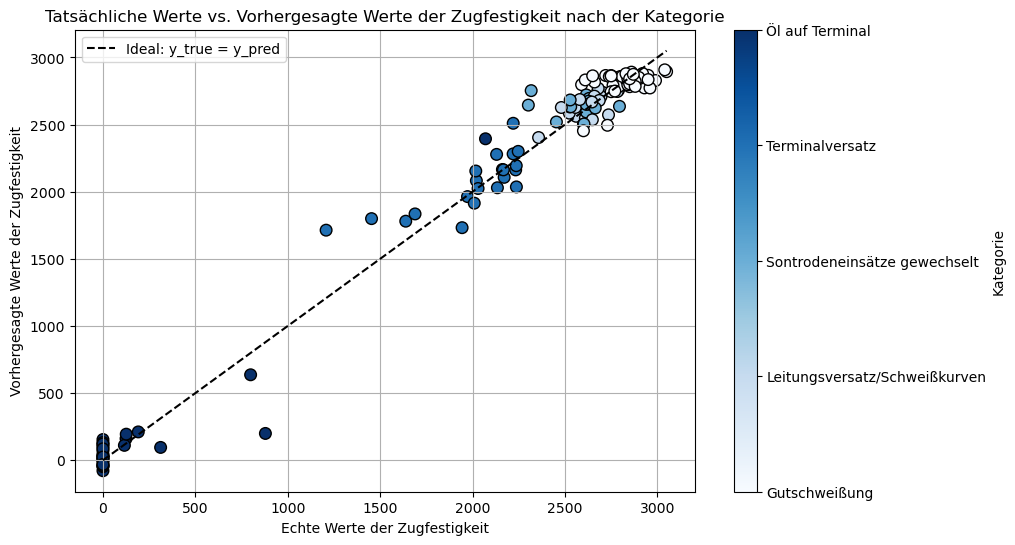

In [2]:
loader = load_stat_feature_pca(n_components=3)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

param_dist = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

svr = SVR()
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 10}
+------+--------+--------+------+
|  R²  |  MAE   |  RSME  | MAPE |
+------+--------+--------+------+
| 0.98 | 94.492 | 142.82 | 5.79 |
+------+--------+--------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.15258805 0.17960123 0.17438643 0.16673488 0.17218931]
Durchschnittliches RMSE: 0.1691


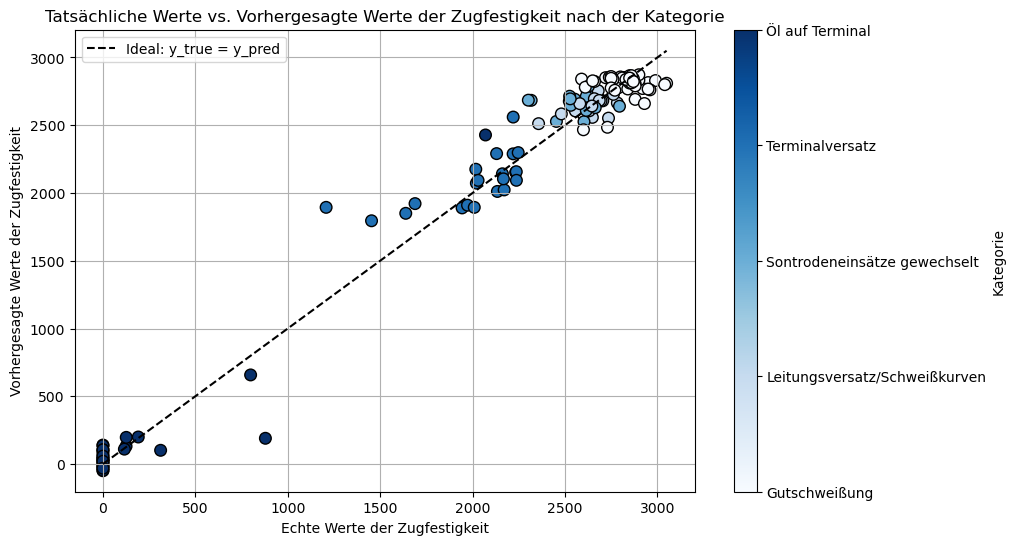

In [3]:
loader = load_stat_feature_pca(n_components=2)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

param_dist = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

svr = SVR()
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 10}
+-------+-------+---------+------+
|   R²  |  MAE  |   RSME  | MAPE |
+-------+-------+---------+------+
| 0.986 | 80.73 | 118.813 | 5.15 |
+-------+-------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.13906215 0.16258319 0.16012425 0.15135787 0.15110001]
Durchschnittliches RMSE: 0.1528


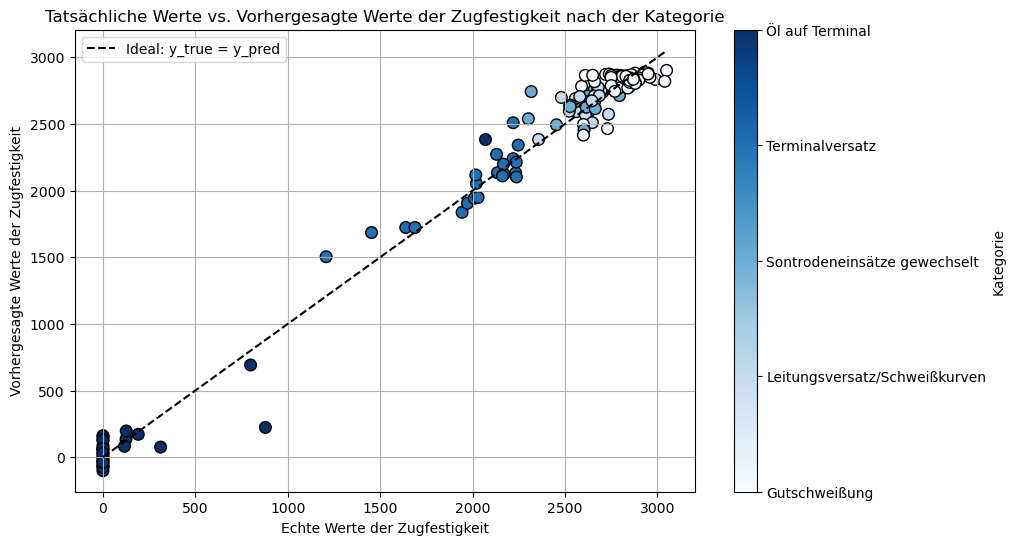

In [4]:
loader = load_stat_feature_pca(n_components=4)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

param_dist = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

svr = SVR()
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Beste Parameter: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
+-------+-------+---------+------+
|   R²  |  MAE  |   RSME  | MAPE |
+-------+-------+---------+------+
| 0.986 | 80.73 | 118.813 | 5.15 |
+-------+-------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.13906215 0.16258319 0.16012425 0.15135787 0.15110001]
Durchschnittliches RMSE: 0.1528


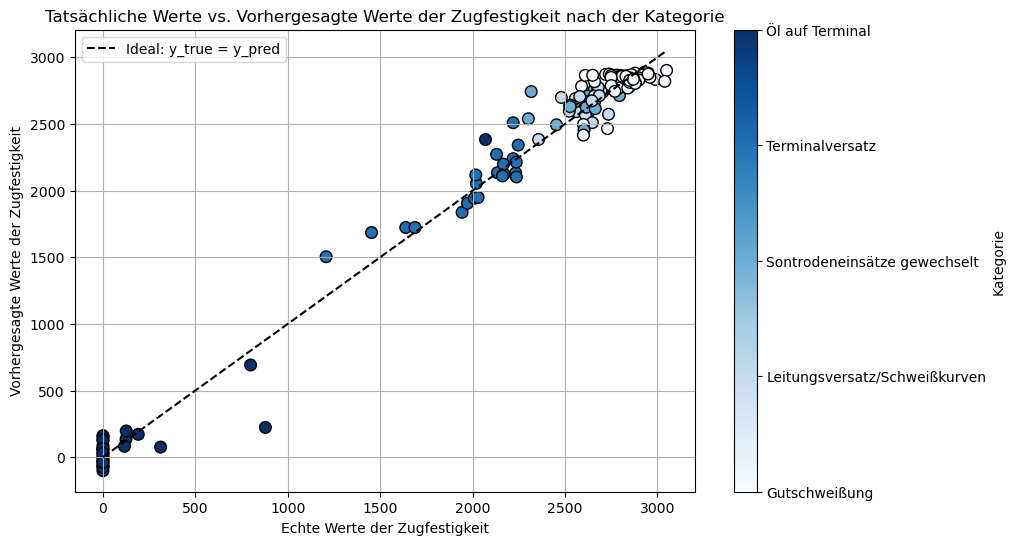

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Hyperparameter-Bereich
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

# SVR-Modell erstellen
svr = SVR()

# GridSearchCV-Objekt initialisieren
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
)

# Modell mit Trainingsdaten fitten
grid_search.fit(x_train, y_train)

# Beste Parameter und Modell extrahieren
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Vorhersagen und Statistik
y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

# RandomforestRegressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.981 | 86.201 | 141.581 | 5.78 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.1567922  0.18716185 0.19889349 0.16590259 0.1663697 ]
Durchschnittliches RMSE: 0.1750


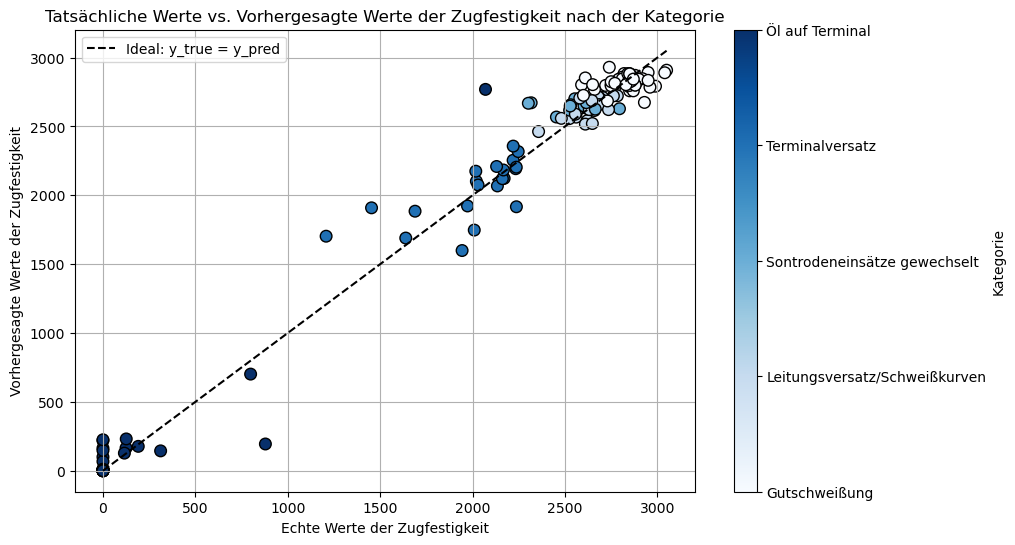

In [6]:
loader = load_stat_feature_pca(n_components=3)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)


param_dist = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

Beste Parameter: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 20, 'bootstrap': True}
+------+--------+---------+------+
|  R²  |  MAE   |   RSME  | MAPE |
+------+--------+---------+------+
| 0.98 | 91.372 | 142.866 | 5.94 |
+------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.15781569 0.19417455 0.22392989 0.18565809 0.16732906]
Durchschnittliches RMSE: 0.1858


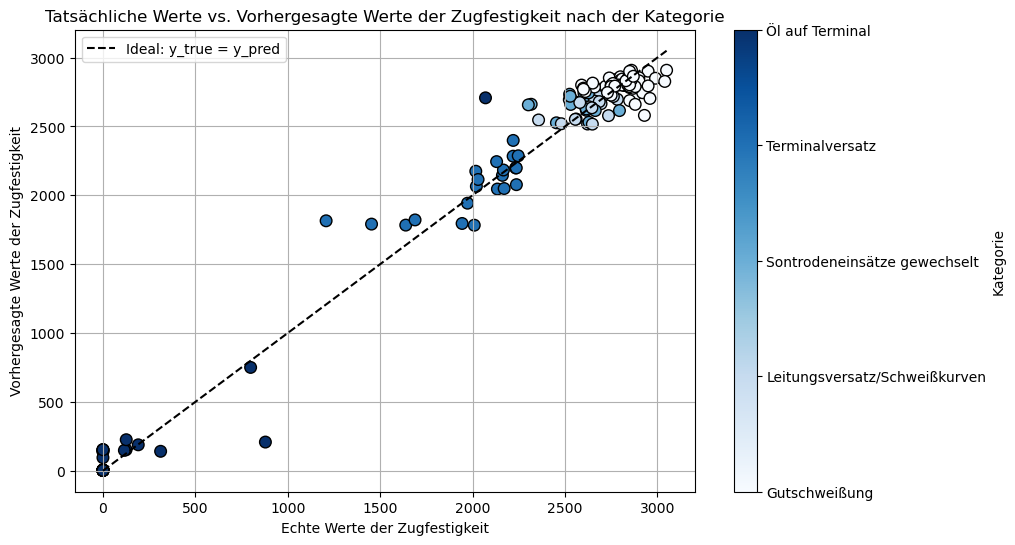

In [7]:
loader = load_stat_feature_pca(n_components=2)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

param_dist = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=0,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.982 | 86.522 | 137.889 | 5.71 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.15993699 0.1903138  0.19642198 0.16321947 0.16463701]
Durchschnittliches RMSE: 0.1749


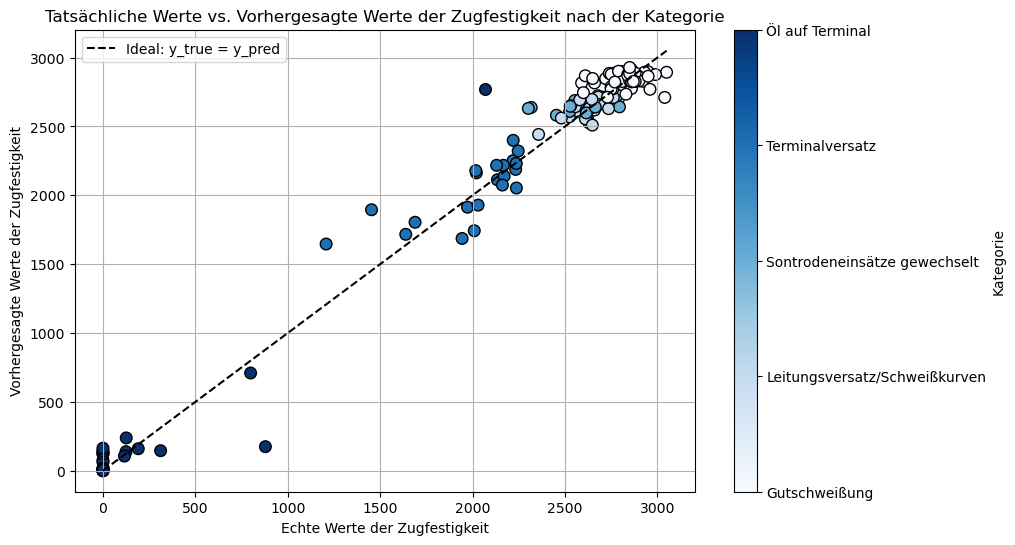

In [8]:
loader = load_stat_feature_pca(n_components=4)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)


param_dist = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

# XGB 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
+------+--------+---------+------+
|  R²  |  MAE   |   RSME  | MAPE |
+------+--------+---------+------+
| 0.98 | 90.776 | 144.026 | 6.8  |
+------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.15150269 0.17748725 0.19232874 0.18624476 0.16742697]
Durchschnittliches RMSE: 0.1750


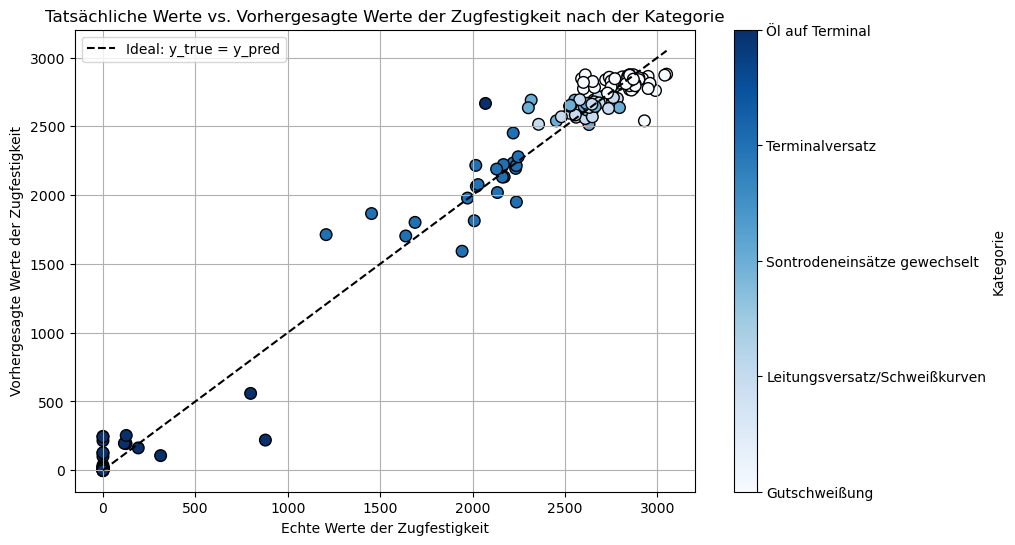

In [9]:
loader = load_stat_feature_pca(n_components=3)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

param_dist = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 6, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.2, 0.5],
}

xgb = XGBRegressor(objective="reg:squarederror", tree_method="auto", random_state=42)


random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)


random_search.fit(x_train, y_train)


best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)


print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Beste Parameter: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.978 | 99.722 | 150.328 | 6.57 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.15374454 0.1827695  0.18830703 0.18236124 0.17761823]
Durchschnittliches RMSE: 0.1770


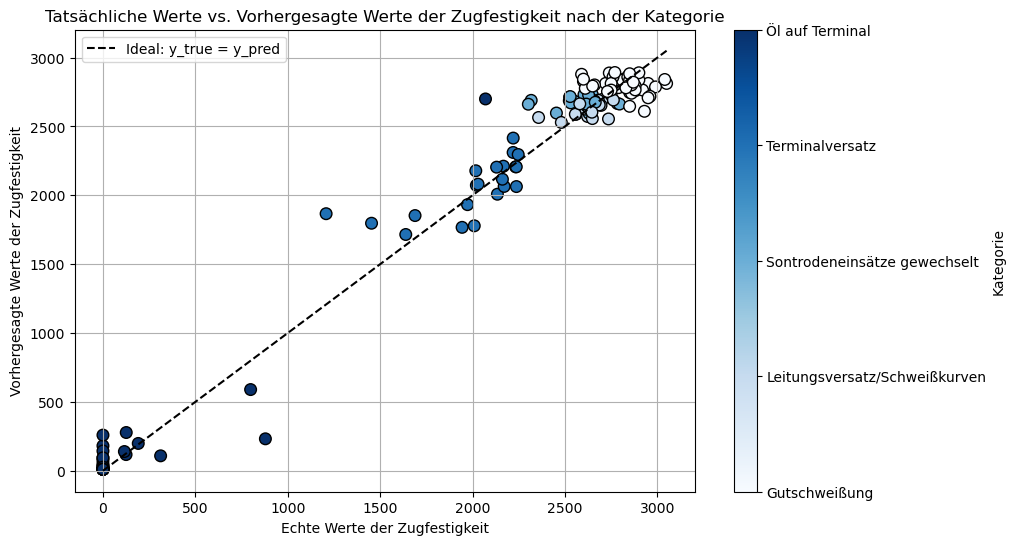

In [10]:
loader = load_stat_feature_pca(n_components=2)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

xgb = XGBRegressor(objective="reg:squarederror", random_state=42)


param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1],
    "subsample": [0.8, 1.0],
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1,
    n_jobs=-1,
)

grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)


print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.982 | 89.102 | 136.383 | 6.19 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.14949718 0.18633461 0.18449313 0.17700881 0.16540048]
Durchschnittliches RMSE: 0.1725


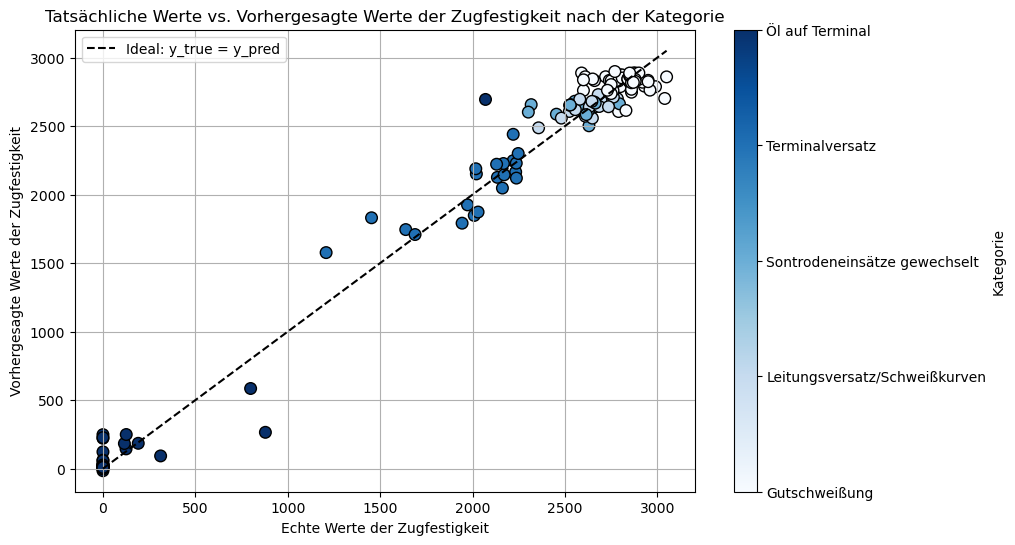

In [11]:
loader = load_stat_feature_pca(n_components=4)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

param_dist = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 6, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.2, 0.5],
}

xgb = XGBRegressor(objective="reg:squarederror", tree_method="auto", random_state=42)


random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)


random_search.fit(x_train, y_train)


best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)


print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

# KNeighborsRegressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'weights': 'uniform', 'p': 2, 'n_neighbors': 8, 'metric': 'minkowski'}
+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.978 | 98.841 | 151.539 | 7.27 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.15274977 0.17516695 0.19997297 0.16788042 0.17345341]
Durchschnittliches RMSE: 0.1738


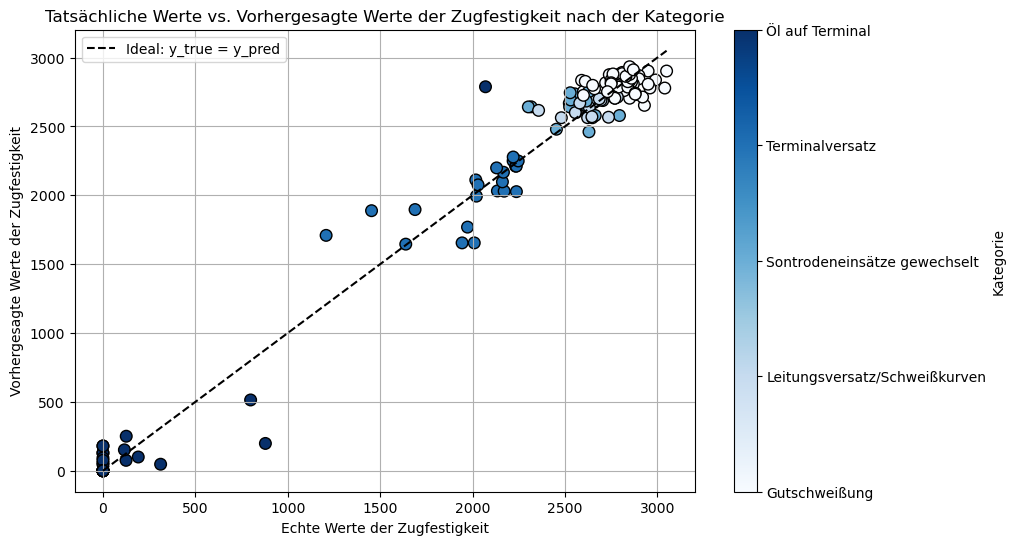

In [12]:
loader = load_stat_feature_pca(n_components=2)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

param_dist = {
    "n_neighbors": [int(x) for x in range(1, 50)],  #
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2],
}

knr = KNeighborsRegressor()
random_search = RandomizedSearchCV(
    estimator=knr,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'weights': 'distance', 'p': 1, 'n_neighbors': 4, 'metric': 'manhattan'}
+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.977 | 94.417 | 154.686 | 7.52 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.133147   0.1614065  0.20125425 0.15863473 0.16594876]
Durchschnittliches RMSE: 0.1641


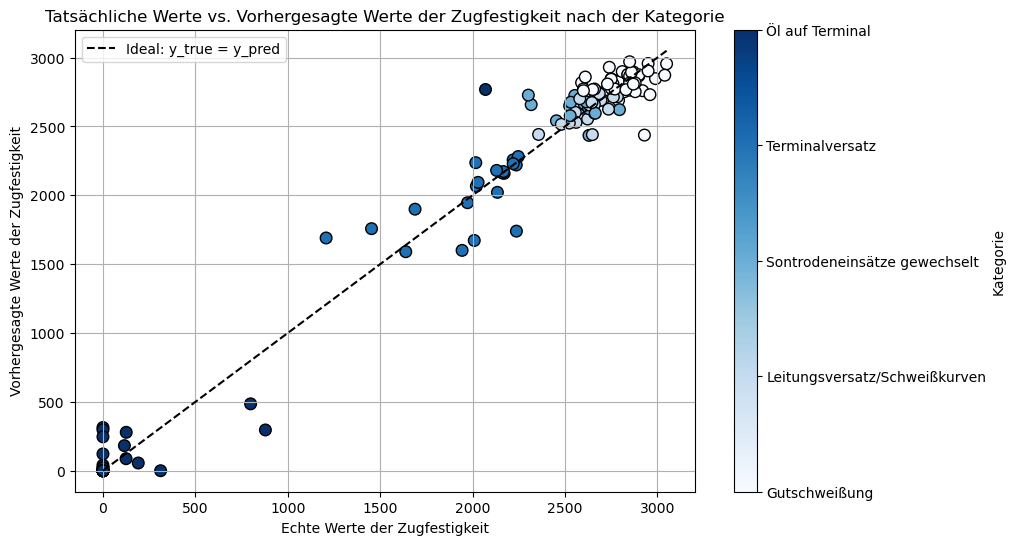

In [13]:
loader = load_stat_feature_pca(n_components=3)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

param_dist = {
    "n_neighbors": [int(x) for x in range(1, 50)],  #
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2],
}

knr = KNeighborsRegressor()
random_search = RandomizedSearchCV(
    estimator=knr,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'weights': 'distance', 'p': 1, 'n_neighbors': 4, 'metric': 'manhattan'}
+------+--------+---------+------+
|  R²  |  MAE   |   RSME  | MAPE |
+------+--------+---------+------+
| 0.98 | 88.372 | 144.425 | 5.92 |
+------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.12678646 0.16717859 0.19187253 0.15860694 0.16741382]
Durchschnittliches RMSE: 0.1624


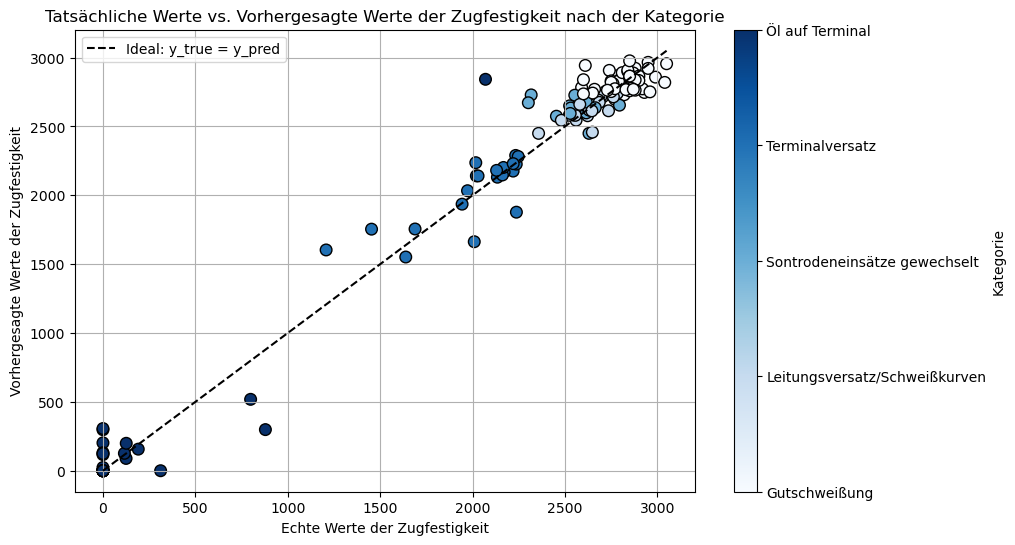

In [14]:
loader = load_stat_feature_pca(n_components=4)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

param_dist = {
    "n_neighbors": [int(x) for x in range(1, 50)],  #
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2],
}

knr = KNeighborsRegressor()
random_search = RandomizedSearchCV(
    estimator=knr,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

# MLPRegressor

Beste Parameter: {'tol': 0.001, 'solver': 'lbfgs', 'max_iter': 2000, 'hidden_layer_sizes': (32,), 'alpha': 0.1, 'activation': 'tanh'}
+-------+--------+--------+------+
|   R²  |  MAE   |  RSME  | MAPE |
+-------+--------+--------+------+
| 0.984 | 87.071 | 127.53 | 5.6  |
+-------+--------+--------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.13460799 0.15846087 0.1724539  0.17222891 0.15493267]
Durchschnittliches RMSE: 0.1585


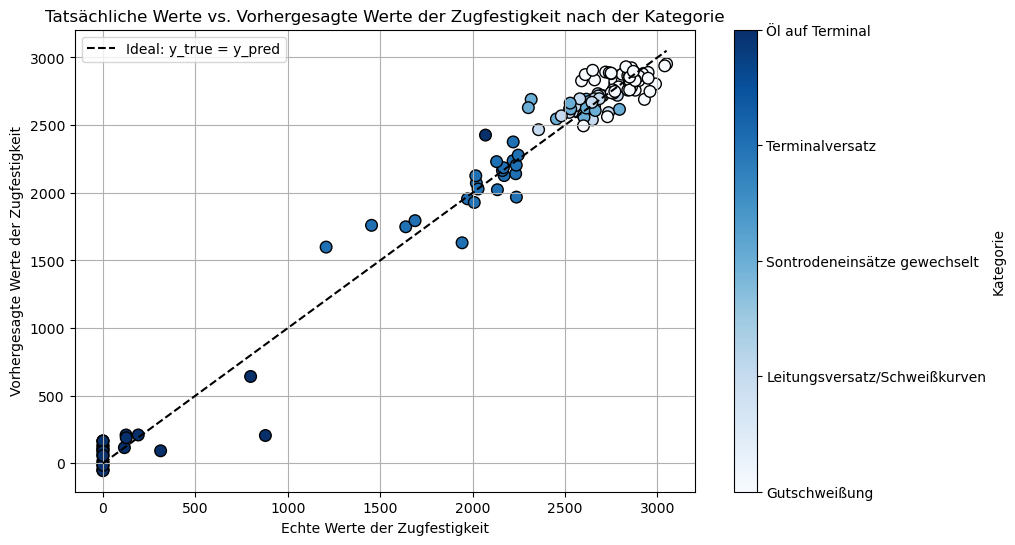

In [15]:
loader = load_stat_feature_pca(n_components=3)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

# Hyperparameter für die Suche
param_dist = {
    "hidden_layer_sizes": [
        (32,),
        (64,),
    ],
    "activation": ["relu", "tanh"],
    "solver": ["lbfgs"],
    "alpha": [0.001, 0.01, 0.1],
    "max_iter": [2000, 5000, 10000],
    "tol": [1e-3],  # Konvergenztoleranz
}

# MLPRegressor
mlp = MLPRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=0,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

# Bestes Modell und Parameter
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Vorhersage auf Testdaten
y_pred = best_model.predict(x_test)

# Ergebnisse ausgeben
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)

Beste Parameter: {'tol': 0.001, 'solver': 'lbfgs', 'max_iter': 10000, 'hidden_layer_sizes': (64,), 'alpha': 0.0001, 'activation': 'tanh'}
+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.988 | 79.166 | 112.583 | 5.09 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.12603824 0.15704508 0.14499392 0.1852106  0.15090692]
Durchschnittliches RMSE: 0.1528


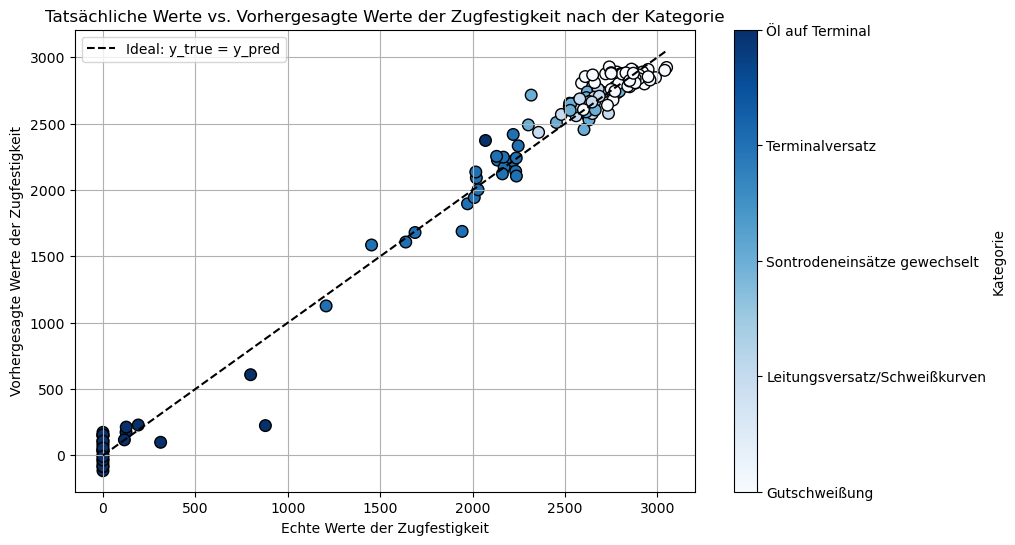

In [28]:
loader = load_stat_feature_pca(n_components=4)

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
    filter_columns=None
)

# Hyperparameter für die Suche
param_dist = {
    "hidden_layer_sizes": [
        (32,),
        (64,),
    ],
    "activation": ["relu", "tanh"],
    "solver": ["lbfgs", "adam", "sgd"],
    "alpha": [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1],
    "max_iter": [5000, 10000, 20000],
    "tol": [1e-3],
}

# MLPRegressor
mlp = MLPRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=0,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

# Bestes Modell und Parameter
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Vorhersage auf Testdaten
y_pred = best_model.predict(x_test)

# Ergebnisse ausgeben
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)